# **Recomendation System**

### **Library**




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re

### **Load Data**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Dataset Capstone - Clear of Tourism Rating.csv to Dataset Capstone - Clear of Tourism Rating.csv
Saving Dataset Capstone - Clear of User.csv to Dataset Capstone - Clear of User.csv
Saving Dataset Capstone - Clear of Dataset (1).csv to Dataset Capstone - Clear of Dataset (1).csv


In [3]:
place_rate = pd.read_csv('Dataset Capstone - Clear of Tourism Rating.csv')
user = pd.read_csv('Dataset Capstone - Clear of User.csv')
place = pd.read_csv('Dataset Capstone - Clear of Dataset (1).csv', dtype={"phone": object})

### Dataset Place

In [10]:
place.head()

,No,city,place_id,place,category,rating,description,phone,sites,price,travel1,travel2,travel3,travel4
0,1,Bangkalan,1001,Agro Edu Wisata Kebun Bang Jani,Wisata Alam,4.1,Agro Edu Wisata Kebun Bang Jani offers an educ...,085231219104,NaN,$,NaN,NaN,NaN,NaN
1,2,Bangkalan,1002,Pantai Rindu,Wisata Bahari,4.5,Pantai Rindu is a beautiful beach located in B...,NaN,NaN,$,NaN,NaN,NaN,NaN
2,3,Bangkalan,1003,Dermaga Rindu,Budaya,4.6,"Dermaga Rindu is located in Bangkalan, a popul...",NaN,https://bangsringunderwater.com/,$,NaN,NaN,NaN,NaN
3,4,Bangkalan,1004,Pandela (Pantai Desa Lajing),Wisata Bahari,4.4,"Pandela Beach, located in Lajing Village, Bang...",081333444609,NaN,$,NaN,NaN,NaN,NaN
4,5,Bangkalan,1005,Pantai Biru,Wisata Bahari,4.6,"Located in Bangkalan, Pantai Biru is a stunnin...",085852222291,http://mangrovebedul.blogspot.com/,$,NaN,NaN,NaN,NaN


In [ ]:
place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         691 non-null    object 
 1   place_id     691 non-null    int64  
 2   place        691 non-null    object 
 3   category     691 non-null    object 
 4   rating       691 non-null    float64
 5   description  691 non-null    object 
 6   phone        276 non-null    float64
 7   sites        143 non-null    object 
 8   price        691 non-null    object 
 9   travel1      11 non-null     object 
 10  travel2      4 non-null      object 
 11  travel3      2 non-null      object 
 12  travel4      0 non-null      float64
 13  images       0 non-null      float64
dtypes: float64(4), int64(1), object(9)
memory usage: 75.7+ KB


In [ ]:
place.describe()

,place_id,rating,phone,travel4,images
count,691.000000,691.000000,2.760000e+02,0.0,0.0
mean,1346.000000,4.458032,6.485304e+10,NaN,NaN
std,199.618803,0.273948,9.338080e+10,NaN,NaN
min,1001.000000,4.000000,3.179765e+07,NaN,NaN
25%,1173.500000,4.200000,3.436752e+09,NaN,NaN
50%,1346.000000,4.500000,8.133361e+10,NaN,NaN
75%,1518.500000,4.700000,8.522983e+10,NaN,NaN
max,1691.000000,5.000000,8.953505e+11,NaN,NaN


### Dataset User

In [ ]:
user.head()

,user_id,location,age
0,1,Surabaya,33
1,2,Malang,28
2,3,Sidoarjo,33
3,4,Mojokerto,28
4,5,Jember,33


In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   250 non-null    int64 
 1   location  250 non-null    object
 2   age       250 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.0+ KB


In [ ]:
user.describe()

,user_id,age
count,250.000000,250.00000
mean,125.500000,30.68400
std,72.312977,8.43259
min,1.000000,17.00000
25%,63.250000,23.00000
50%,125.500000,31.00000
75%,187.750000,37.75000
max,250.000000,45.00000


### Dataset Place Rate

In [ ]:
place_rate.head()

,user_id,place_id,rating
0,161,1202,3.2
1,96,1570,3.3
2,71,1191,3.0
3,19,1429,3.0
4,34,1209,3.8


In [ ]:
place_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13716 entries, 0 to 13715
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   13716 non-null  int64  
 1   place_id  13716 non-null  int64  
 2   rating    13716 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 321.6 KB


In [ ]:
place_rate.describe()

,user_id,place_id,rating
count,13716.000000,13716.000000,13716.000000
mean,125.101706,1344.536016,4.006664
std,72.132105,199.849335,0.579034
min,1.000000,1001.000000,3.000000
25%,63.000000,1171.000000,3.500000
50%,125.000000,1344.000000,4.000000
75%,187.000000,1517.000000,4.500000
max,250.000000,1691.000000,5.000000


### **Data Preparation**

Drop Kolom pada dataset place diantaranya phone, sites, travel1, travel2,travel3, travel4, images

In [4]:
place = place.drop(columns=['phone', 'sites', 'travel1','travel2','travel3', 'travel4'],axis=1)
place.head()

,No,city,place_id,place,category,rating,description,price
0,1,Bangkalan,1001,Agro Edu Wisata Kebun Bang Jani,Wisata Alam,4.1,Agro Edu Wisata Kebun Bang Jani offers an educ...,$
1,2,Bangkalan,1002,Pantai Rindu,Wisata Bahari,4.5,Pantai Rindu is a beautiful beach located in B...,$
2,3,Bangkalan,1003,Dermaga Rindu,Budaya,4.6,"Dermaga Rindu is located in Bangkalan, a popul...",$
3,4,Bangkalan,1004,Pandela (Pantai Desa Lajing),Wisata Bahari,4.4,"Pandela Beach, located in Lajing Village, Bang...",$
4,5,Bangkalan,1005,Pantai Biru,Wisata Bahari,4.6,"Located in Bangkalan, Pantai Biru is a stunnin...",$


### Cek Missing Value

In [13]:
place.isnull().sum()

No             0
city           0
place_id       0
place          0
category       0
rating         0
description    0
price          0
dtype: int64

In [14]:
user.isnull().sum()

user_id     0
location    0
age         0
dtype: int64

In [15]:
place_rate.isnull().sum()

user_id     0
place_id    0
rating      0
dtype: int64

### Jumlah duplikasi

In [16]:
print(f'Jumlah dataset places yang duplikat: {place.duplicated().sum()}')
print(f'Jumlah dataset rating yang duplikat: {user.duplicated().sum()}')
print(f'Jumlah dataset place_rate yang duplikat: {place_rate.duplicated().sum()}')

Jumlah dataset places yang duplikat: 0
Jumlah dataset rating yang duplikat: 0
Jumlah dataset place_rate yang duplikat: 23


### Delete Duplicate

In [5]:
place_rate.drop_duplicates(inplace = True)

### **Modelling**

**TF-ID Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

tf.fit(place['category'])

tf.get_feature_names_out()

array(['alam', 'bahari', 'budaya', 'hiburan', 'religi', 'taman', 'wisata'],
      dtype=object)

In [ ]:
tfidf_matrix = tf.fit_transform(place['category'])
tfidf_matrix.shape

(691, 7)

In [ ]:
tfidf_matrix.todense()

matrix([[0.75921964, 0.        , 0.        , ..., 0.        , 0.        ,
         0.65083449],
        [0.        , 0.91059878, 0.        , ..., 0.        , 0.        ,
         0.41329149],
        [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.96677538, 0.        ,
         0.25562738]])

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=place.place
).sample(10, axis=0)

,alam,bahari,budaya,hiburan,religi,taman,wisata
place,,,,,,,
Goa Maharani Mazoola,0.00000,0.910599,0.0,0.0,0.0,0.0,0.413291
Pemandian Telaga Sewu,0.75922,0.000000,0.0,0.0,0.0,0.0,0.650834
Museum Umum Mandilaras,0.00000,0.000000,1.0,0.0,0.0,0.0,0.000000
Wisata Migas Wonocolo,0.75922,0.000000,0.0,0.0,0.0,0.0,0.650834
Pantai Cemara Kawang,0.75922,0.000000,0.0,0.0,0.0,0.0,0.650834
Wego,0.75922,0.000000,0.0,0.0,0.0,0.0,0.650834
Potreh Koning,0.75922,0.000000,0.0,0.0,0.0,0.0,0.650834
Pantai Watu Godeg,0.00000,0.910599,0.0,0.0,0.0,0.0,0.413291
Pemandian Tirta Nirwana,0.75922,0.000000,0.0,0.0,0.0,0.0,0.650834


**Cosine Similafrity**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.26898436, 0.        , ..., 0.        , 0.        ,
        0.16637112],
       [0.26898436, 1.        , 0.        , ..., 0.        , 0.        ,
        0.10564862],
       [0.        , 0.        , 1.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.16637112, 0.10564862, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
cosine_sim_df = pd.DataFrame(
    cosine_sim, index=place.place, columns=place.place)
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(10, axis=0)

Shape: (691, 691)


place,Agro Edu Wisata Kebun Bang Jani,Pantai Rindu,Dermaga Rindu,Pandela (Pantai Desa Lajing),Pantai Biru,Api Alam Konang,Air Terjun Kokop Dhurjan,Bukit Kapur Parseh,Gunung Geger,Hutan Mangrove Labuhan,...,Telaga Buret,Waduk Wonorejo,Brond Waterpark,Kampung Susu Dinasty,Monumen Wajakensis,Ori Green,Ratiban,Museum Daerah,Museum Tulungagung,Situs Aryojeding
place,,,,,,,,,,,,,,,,,,,,,
Ratiban,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,0.000000,0.0,0.000000,1.0,0.0,0.0,0.000000
Alun alun Tugu Balaikota,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.0,1.0,1.0,0.000000
Pentas Reog Bulan Purnama,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.0,1.0,1.0,0.000000
Pantai Molang,0.268984,1.000000,0.0,1.000000,1.000000,0.268984,0.268984,0.268984,0.268984,0.268984,...,0.268984,1.000000,0.0,0.268984,0.0,0.268984,0.0,0.0,0.0,0.105649
Puncak Ratu,1.000000,0.268984,0.0,0.268984,0.268984,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.268984,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,0.166371
Pemandian Kebon Agung,1.000000,0.268984,0.0,0.268984,0.268984,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.268984,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,0.166371
Pesona Embung Pandean,1.000000,0.268984,0.0,0.268984,0.268984,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.268984,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,0.166371
Museum Kambang Putih,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.0,1.0,1.0,0.000000
Pantai Cemara Kawang,1.000000,0.268984,0.0,0.268984,0.268984,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.268984,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,0.166371


In [ ]:
def recommend(place_name, similarity_data=cosine_sim_df, items=place[['place', 'category']], k=5):
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(place_name, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
place_name = 'Selecta'
place[place.place.eq(place_name)]

,city,place_id,place,category,rating,description,price
210,Kota Batu,1211,Selecta,Wisata Alam,4.2,Selecta is a famous recreational park in Batu ...,$$


In [ ]:
recommend(place_name)

,place,category
0,Agro Edu Wisata Kebun Bang Jani,Wisata Alam
1,Waduk Selorejo,Wisata Alam
2,Air Terjun Dlundung,Wisata Alam
3,Flora Wisata San Terra,Wisata Alam
4,Gunung Bromo,Wisata Alam


### **Model Developement Collaborative Filtering**

In [6]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [7]:
user_ids = place_rate['user_id'].unique().tolist()
print('list User_Id: ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User_Id : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User_Id: ', user_encoded_to_user)

list User_Id:  [161, 96, 71, 19, 34, 206, 50, 175, 46, 184, 185, 83, 51, 54, 90, 81, 118, 156, 27, 176, 244, 249, 147, 225, 179, 7, 157, 247, 171, 69, 94, 113, 107, 120, 186, 136, 170, 204, 42, 13, 154, 18, 212, 144, 101, 3, 219, 79, 250, 98, 173, 150, 232, 23, 59, 190, 68, 243, 57, 233, 151, 111, 60, 73, 216, 213, 238, 55, 117, 208, 63, 25, 26, 177, 167, 65, 9, 236, 198, 28, 40, 143, 134, 38, 196, 203, 85, 64, 30, 210, 99, 131, 12, 91, 245, 104, 146, 180, 29, 112, 230, 188, 21, 145, 119, 165, 166, 140, 240, 201, 129, 58, 191, 149, 137, 246, 237, 110, 116, 62, 87, 100, 174, 33, 92, 223, 178, 148, 168, 227, 95, 159, 214, 41, 205, 128, 22, 16, 32, 194, 218, 142, 228, 56, 43, 220, 48, 84, 31, 172, 8, 130, 52, 45, 37, 44, 209, 124, 239, 231, 222, 6, 163, 187, 2, 36, 72, 234, 242, 126, 193, 77, 207, 125, 78, 47, 14, 89, 15, 17, 86, 197, 105, 182, 155, 169, 164, 221, 1, 200, 122, 82, 76, 162, 123, 74, 24, 10, 202, 248, 199, 93, 135, 141, 103, 241, 106, 224, 217, 4, 114, 132, 189, 20, 127, 13

In [8]:
place_ids = place_rate['place_id'].unique().tolist()
print('list Place_Id: ', place_ids)
place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}
place_encoded_to_place = {i: x for i, x in enumerate(place_ids)}

list Place_Id:  [1202, 1570, 1191, 1429, 1209, 1129, 1292, 1009, 1146, 1173, 1517, 1410, 1154, 1427, 1484, 1606, 1458, 1601, 1609, 1545, 1282, 1302, 1254, 1406, 1106, 1467, 1198, 1482, 1648, 1572, 1193, 1457, 1607, 1632, 1206, 1463, 1466, 1451, 1249, 1510, 1418, 1581, 1045, 1051, 1244, 1670, 1277, 1017, 1089, 1215, 1532, 1080, 1419, 1311, 1323, 1114, 1605, 1100, 1027, 1420, 1431, 1229, 1200, 1287, 1107, 1480, 1521, 1551, 1546, 1092, 1490, 1690, 1584, 1123, 1326, 1192, 1366, 1585, 1500, 1136, 1195, 1639, 1681, 1691, 1252, 1346, 1218, 1685, 1018, 1073, 1165, 1241, 1085, 1633, 1529, 1640, 1273, 1591, 1076, 1472, 1110, 1068, 1207, 1220, 1278, 1308, 1384, 1348, 1435, 1363, 1445, 1671, 1596, 1628, 1134, 1116, 1565, 1062, 1544, 1079, 1325, 1263, 1592, 1061, 1145, 1372, 1327, 1267, 1673, 1299, 1066, 1104, 1426, 1181, 1331, 1008, 1005, 1144, 1477, 1164, 1631, 1512, 1653, 1387, 1504, 1402, 1661, 1659, 1611, 1174, 1026, 1142, 1652, 1122, 1276, 1608, 1035, 1556, 1347, 1407, 1518, 1444, 1590, 1593,

In [9]:
place_rate['user'] = place_rate['user_id'].map(user_to_user_encoded)
place_rate['place'] = place_rate['place_id'].map(place_to_place_encoded)

In [10]:
users_count = len(user_to_user_encoded)
place_count = len(place_encoded_to_place)

place_rate['rates'] = place_rate['rating'].values.astype(np.float32)

min_rating = min(place_rate['rating'])
max_rating = max(place_rate['rating'])

print(f'Users Count: {users_count}')
print(f'Places Count: {place_count}')
print(f'Min rating: {min_rating}')
print(f'Max rating: {max_rating}')

Users Count: 250
Places Count: 691
Min rating: 3.0
Max rating: 5.0


**Split Data Train and Validation**

In [11]:
x = place_rate[['user', 'place']].values
y = place_rate['rating'].apply(lambda x: (
    x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * place_rate.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[  0   0]
 [  1   1]
 [  2   2]
 ...
 [ 80 165]
 [100   6]
 [152 682]] [0.1  0.15 0.   ... 0.05 0.65 0.8 ]


In [12]:
class RecommenderNet(tf.keras.Model):
  def __init__(self, users_count, place_count, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.users_count = users_count
    self.place_count = place_count
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        users_count,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-8)
    )
    self.user_bias = layers.Embedding(users_count, 1)
    self.place_embedding = layers.Embedding(
        place_count,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-8)
    )
    self.place_bias = layers.Embedding(place_count, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    place_vector = self.place_embedding(inputs[:, 1])
    place_bias = self.place_bias(inputs[:, 1])

    dot_user_place = tf.tensordot(user_vector, place_vector, 2)

    x = dot_user_place + user_bias + place_bias

    return tf.nn.sigmoid(x)

In [13]:
model = RecommenderNet(users_count, place_count, 100)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [15]:
from keras.callbacks import  EarlyStopping

callbacks = EarlyStopping(
    min_delta=0.0001,
    patience=5,
    restore_best_weights=True,
)

In [16]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[callbacks]
)

Epoch 1/100
1370/1370 [==============================] - 13s 9ms/step - loss: 0.6653 - root_mean_squared_error: 0.2660 - val_loss: 0.7113 - val_root_mean_squared_error: 0.3006
Epoch 2/100
1370/1370 [==============================] - 10s 7ms/step - loss: 0.6663 - root_mean_squared_error: 0.2668 - val_loss: 0.7119 - val_root_mean_squared_error: 0.3011
Epoch 3/100
1370/1370 [==============================] - 11s 8ms/step - loss: 0.6661 - root_mean_squared_error: 0.2666 - val_loss: 0.7114 - val_root_mean_squared_error: 0.3007
Epoch 4/100
1370/1370 [==============================] - 11s 8ms/step - loss: 0.6669 - root_mean_squared_error: 0.2673 - val_loss: 0.7117 - val_root_mean_squared_error: 0.3010
Epoch 5/100
1370/1370 [==============================] - 12s 9ms/step - loss: 0.6668 - root_mean_squared_error: 0.2672 - val_loss: 0.7120 - val_root_mean_squared_error: 0.3012
Epoch 6/100
1370/1370 [==============================] - 9s 7ms/step - loss: 0.6653 - root_mean_squared_error: 0.2659 - 

**MODEL LAIN**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [33]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, users_count, places_count, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.users_count = users_count
        self.places_count = places_count
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            users_count,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-3)  # Increased regularization
        )
        self.user_bias = layers.Embedding(users_count, 1)
        self.place_embedding = layers.Embedding(
            places_count,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-3)  # Increased regularization
        )
        self.place_bias = layers.Embedding(places_count, 1)
        self.dropout = layers.Dropout(0.5)  # Increased dropout rate
        self.batch_norm = layers.BatchNormalization()

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        place_vector = self.place_embedding(inputs[:, 1])
        place_bias = self.place_bias(inputs[:, 1])

        dot_user_place = tf.tensordot(user_vector, place_vector, 2)
        x = dot_user_place + user_bias + place_bias
        x = self.batch_norm(x)
        x = self.dropout(x)

        return tf.nn.sigmoid(x)

In [34]:
# Training with the updated network architecture
model = RecommenderNet(users_count, place_count, 100)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Reduced learning rate
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
# callbacks = EarlyStopping(
#     min_delta=0.0001,
#     patience=5,
#     restore_best_weights=True,
# )

In [35]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=32,  # Increased batch size
    epochs=50,
    validation_data=(x_val, y_val)
)

Epoch 1/50
343/343 [==============================] - 10s 9ms/step - loss: 1.0916 - root_mean_squared_error: 0.3532 - val_loss: 0.9143 - val_root_mean_squared_error: 0.3193
Epoch 2/50
343/343 [==============================] - 3s 8ms/step - loss: 0.9246 - root_mean_squared_error: 0.3467 - val_loss: 0.8756 - val_root_mean_squared_error: 0.3509
Epoch 3/50
343/343 [==============================] - 2s 5ms/step - loss: 0.8488 - root_mean_squared_error: 0.3446 - val_loss: 0.7990 - val_root_mean_squared_error: 0.3352
Epoch 4/50
343/343 [==============================] - 2s 5ms/step - loss: 0.8029 - root_mean_squared_error: 0.3375 - val_loss: 0.7628 - val_root_mean_squared_error: 0.3257
Epoch 5/50
343/343 [==============================] - 2s 5ms/step - loss: 0.7769 - root_mean_squared_error: 0.3323 - val_loss: 0.7457 - val_root_mean_squared_error: 0.3205
Epoch 6/50
343/343 [==============================] - 2s 6ms/step - loss: 0.7620 - root_mean_squared_error: 0.3286 - val_loss: 0.7365 - val



---



---



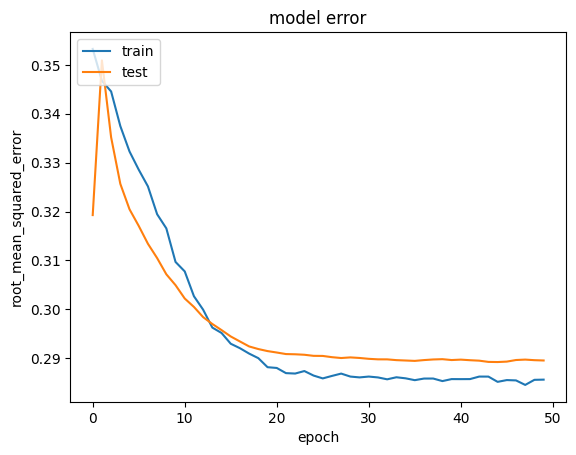

In [36]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model error')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

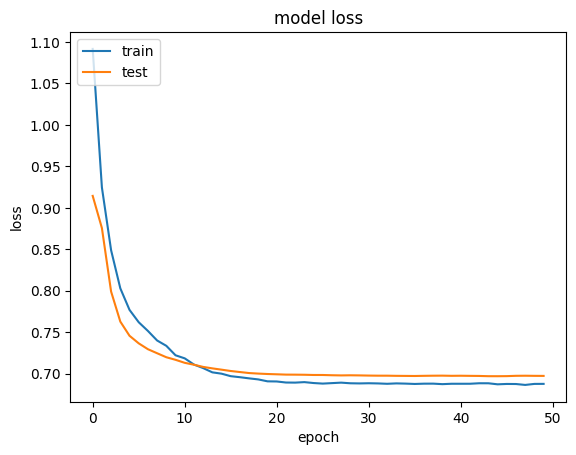

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Try Recommend**

In [38]:
place_df = place
ratings_df = place_rate

In [39]:
user_id = ratings_df.user_id.sample(1).iloc[0]
place_rated = ratings_df[ratings_df.user_id == user_id]

place_not_rated = place_df[~place_df['place_id'].isin(
    place_rated.place_id.values)]['place_id']
place_not_rated = list(
    set(place_not_rated).intersection(set(place_to_place_encoded.keys()))
)

place_not_rated = [
    [place_to_place_encoded.get(x)] for x in place_not_rated]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_rated), place_not_rated)
)

In [40]:
ratings = model.predict(user_place_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_rated[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('=====' * 8)
print('Place with high ratings from user')
print('-----' * 8)

top_place_user = (
    place_rated.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .place_id.values
)

place_df_rows = place_df[place_df['place_id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.place + ':', row.category)

print('-----' * 8)
print('Top 10 place recommendation')
print('-----' * 8)

recommended_place = place_df[place_df['place_id'].isin(recommended_place_ids)]
for row in recommended_place.itertuples():
    print(row.place + ':', row.category)

20/20 [==============================] - 0s 2ms/step
Showing recommendations for users: 218
Place with high ratings from user
----------------------------------------
Obyek Wisata Trinil: Wisata Alam
Kampung Batik Sidomukti: Budaya
Srambang Park: Taman Hiburan
Kolam Renang Tirto Menggolo: Wisata Alam
Wisata Bahari Tlocor: Wisata Bahari
----------------------------------------
Top 10 place recommendation
----------------------------------------
Pemandian Air Panas Blawan: Wisata Alam
Golf Glantangan: Taman Hiburan
Malang Night Market: Budaya
Kampung Lawas Maspati: Budaya
Monumen Tugu Pahlawan: Budaya
Pura Jagad Karana: Wisata Religi
Pemandian Air Panas Padusan: Wisata Alam
Pemandian Taman Ria Suropati: Wisata Alam
Kolam Renang Puri Surya Jaya: Taman Hiburan
Air Terjun Talempong: Wisata Alam


## Deploy to TFLITE

In [28]:
tf.saved_model.save(model, "/content/model.pbtxt" )

In [29]:
converter = tf.lite.TFLiteConverter.from_keras_model(model=model)
tflite_model = converter.convert()

In [30]:
open("RecommenderNetV1.tflite", "wb").write(tflite_model)

386324

In [43]:
model.save_weights("/content/")